In [1]:
import pandas as pd

In [2]:
# Création de la liste des données
data = [
    [2023, '2,50%', '0%', '3,13%', '5,40%'],
    [2022, '2%', '1,72%', '1,38%', '5,20%'],
    [2021, '1,30%', '0,03%', '0,50%', '1,60%'],
    [2020, '1,30%', '-0,11%', '0,52%', '0,50%'],
    [2019, '1,50%', '0,20%', '0,75%', '1,10%'],
    [2018, '1,80%', '0,80%', '0,75%', '1,80%'],
    [2017, '1,80%', '0,85%', '0,75%', '1,00%'],
    [2016, '1,90%', '0,50%', '0,75%', '0,20%'],
    [2015, '2,30%', '0,90%', '0,91%', '0%'],
    [2014, '2,50%', '1,70%', '1,15%', '0,50%'],
    [2013, '2,80%', '2,30%', '1,60%', '0,90%'],
    [2012, '2,90%', '2,60%', '2,25%', '2,00%'],
    [2011, '3,00%', '3,40%', '2,1%', '2,1%'],
    [2010, '3,40%', '3,20%', '1,50%', '1,50%'],
    [2009, '3,60%', '3,70%', '1,90%', '0,10%'],
    [2008, '4,00%', '4,30%', '3,70%', '2,80%'],
    [2007, '4,10%', '4,40%', '2,90%', '1,50%'],
    [2006, '4,10%', '3,90%', '2,40%', '1,60%'],
    [2005, '4,20%', '3,50%', '2,10%', '1,80%'],
    [2004, '4,40%', '4,20%', '2,30%', '2,10%'],
    [2003, '4,50%', '4,20%', '2,70%', '2,10%'],
    [2002, '4,80%', '4,90%', '3,00%', '1,90%'],
    [2001, '5,30%', '5,00%', '3,00%', '1,70%'],
    [2000, '5,30%', '5,50%', '2,70%', '1,70%'],
]

# https://www.toutsurmesfinances.com/placements/assurance-vie-historique-des-taux-de-rendements-des-fonds-en-euros-depuis-2000.html


# Création du dataframe
df = pd.DataFrame(data, columns=['Année', 'Rendement des supports euros', "Rendement des emprunts d'état - TME", 'Taux du Livret A', 'Inflation'])
def percent_to_float(percent_str):
    return float(percent_str.strip('%').replace(',', '.'))/100

df['Rendement des supports euros'] = df['Rendement des supports euros'].apply(percent_to_float)
df['Rendement des emprunts d\'état - TME'] = df['Rendement des emprunts d\'état - TME'].apply(percent_to_float)
df['Taux du Livret A'] = df['Taux du Livret A'].apply(percent_to_float)
df['Inflation'] = df['Inflation'].apply(percent_to_float)

# Set 'Année' as index
df.set_index('Année', inplace=True)

print(df)


       Rendement des supports euros  Rendement des emprunts d'état - TME   
Année                                                                      
2023                          0.025                               0.0000  \
2022                          0.020                               0.0172   
2021                          0.013                               0.0003   
2020                          0.013                              -0.0011   
2019                          0.015                               0.0020   
2018                          0.018                               0.0080   
2017                          0.018                               0.0085   
2016                          0.019                               0.0050   
2015                          0.023                               0.0090   
2014                          0.025                               0.0170   
2013                          0.028                               0.0230   
2012        

          Livret A
2013   1031.300000
2014   2059.331940
2015   3074.628600
2016   4095.816668
2017   5134.035293
2018   6180.040558
2019   7233.890862
2020   8295.645044
2021   9380.235414
2022  10499.608121
2023  11683.601851


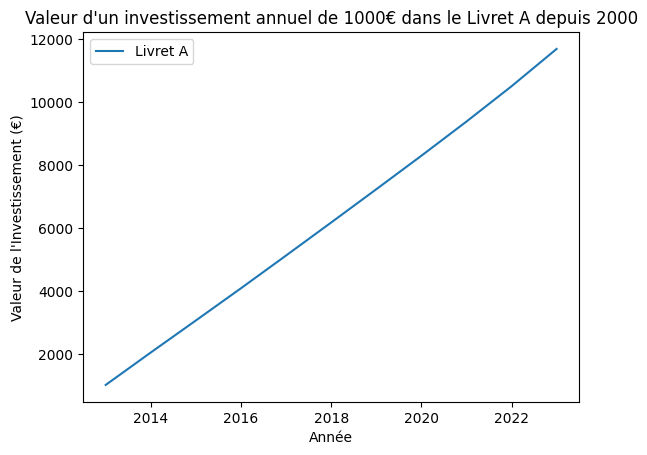

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Initialiser le montant d'investissement
investment = 0
investment_history = []

# Parcourir chaque année dans l'index du dataframe
for year in df.index:
    # Ne considérer que les années à partir de 2000
    if year >= 2013:
        # Ajouter 1000€ à l'investissement chaque année
        investment += 1000
        # Appliquer le taux de rendement du Livret A pour cette année
        investment *= (1 + df.loc[year, 'Taux du Livret A'])
        # Enregistrer l'investissement actuel dans l'historique
        investment_history.append(investment)

# Créer un nouveau DataFrame pour les années et l'historique de l'investissement
investment_df = pd.DataFrame(investment_history, index=np.arange(2013,2024), columns=['Livret A'])
print(investment_df)
# Tracer le graphique
investment_df.plot(kind='line')
plt.title("Valeur d'un investissement annuel de 1000€ dans le Livret A depuis 2000")
plt.ylabel('Valeur de l\'Investissement (€)')
plt.xlabel('Année')
plt.show()

          Livret A     Fond euro
2013   1031.300000   1025.000000
2014   2059.331940   2065.500000
2015   3074.628600   3105.351500
2016   4095.816668   4158.721069
2017   5134.035293   5236.101886
2018   6180.040558   6348.351719
2019   7233.890862   7480.622050
2020   8295.645044   8641.753869
2021   9380.235414   9863.514208
2022  10499.608121  11135.102064
2023  11683.601851  12474.884921


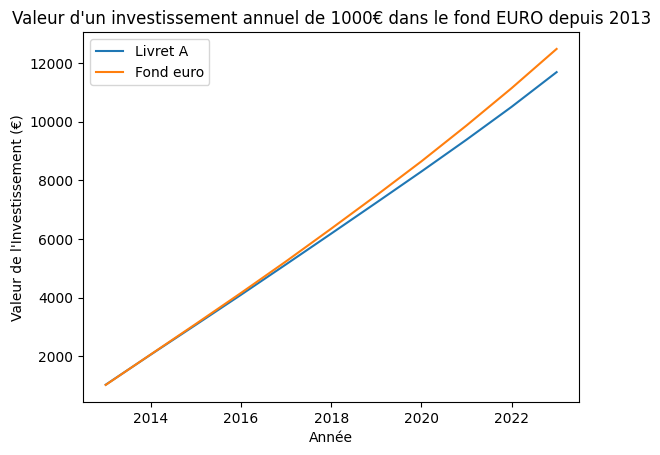

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# Initialiser le montant d'investissement
investment = 0
investment_history = []

# Parcourir chaque année dans l'index du dataframe
for year in df.index:
    # Ne considérer que les années à partir de 2000
    if year >= 2013:
        # Ajouter 1000€ à l'investissement chaque année
        investment += 1000
        # Appliquer le taux de rendement du Livret A pour cette année
        investment *= (1 + df.loc[year, 'Rendement des supports euros'])
        # Enregistrer l'investissement actuel dans l'historique
        investment_history.append(investment)

# Créer un nouveau DataFrame pour les années et l'historique de l'investissement
investment_df['Fond euro'] = investment_history
print(investment_df)
# Tracer le graphique
investment_df.plot(kind='line')
plt.title("Valeur d'un investissement annuel de 1000€ dans le fond EURO depuis 2013")
plt.ylabel('Valeur de l\'Investissement (€)')
plt.xlabel('Année')
plt.show()

          Livret A     Fond euro  Rendement des emprunts d'état - TME
2013   1031.300000   1025.000000                          1000.000000
2014   2059.331940   2065.500000                          2034.400000
2015   3074.628600   3105.351500                          3035.310320
2016   4095.816668   4158.721069                          4030.871479
2017   5134.035293   5236.101886                          5040.933222
2018   6180.040558   6348.351719                          6089.260687
2019   7233.890862   7480.622050                          7149.519403
2020   8295.645044   8641.753869                          8190.267000
2021   9380.235414   9863.514208                          9272.979403
2022  10499.608121  11135.102064                         10447.620053
2023  11683.601851  12474.884921                         11710.915314


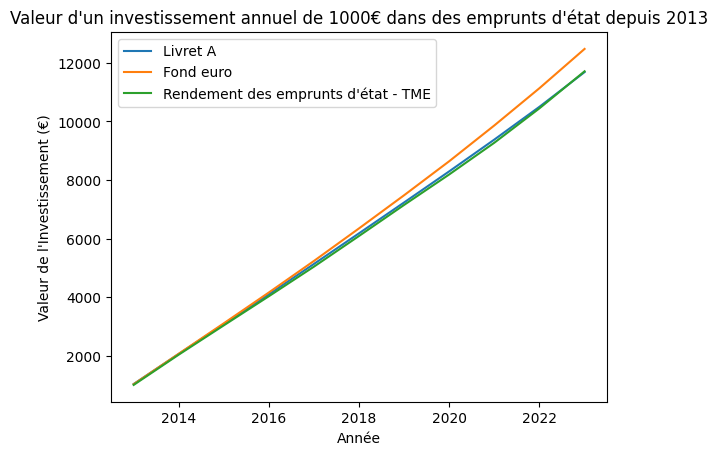

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Initialiser le montant d'investissement
investment = 0
investment_history = []

# Parcourir chaque année dans l'index du dataframe
for year in df.index:
    # Ne considérer que les années à partir de 2000
    if year >= 2013:
        # Ajouter 1000€ à l'investissement chaque année
        investment += 1000
        # Appliquer le taux de rendement du Livret A pour cette année
        investment *= (1 + df.loc[year, "Rendement des emprunts d'état - TME"])
        # Enregistrer l'investissement actuel dans l'historique
        investment_history.append(investment)

# Créer un nouveau DataFrame pour les années et l'historique de l'investissement
investment_df["Rendement des emprunts d'état - TME"] = investment_history
print(investment_df)
# Tracer le graphique
investment_df.plot(kind='line')
plt.title("Valeur d'un investissement annuel de 1000€ dans des emprunts d'état depuis 2013")
plt.ylabel('Valeur de l\'Investissement (€)')
plt.xlabel('Année')
plt.show()

In [6]:
import pandas as pd



In [7]:
data_tal = pd.read_csv(r'https://raw.githubusercontent.com/theomdvn/Analyse_AV_TAL/main/data_bce_EUR.csv', parse_dates=True)
data_or = pd.read_csv(r'https://raw.githubusercontent.com/theomdvn/Analyse_AV_TAL/main/df_currency_10y.csv', parse_dates=True)
# Now, 'Result' series will have the multiplied values of corresponding dates.
data_or.set_index('date',inplace=True)
data_tal.set_index('TIME_PERIOD',inplace=True)



In [8]:
USDEUR = 1/data_tal['USDEUR'].copy()
USDGOLD = 0.2*data_or['USDGOLD'].copy()

# Convert the index to datetime format
USDEUR.index = pd.to_datetime(USDEUR.index)
USDGOLD.index = pd.to_datetime(USDGOLD.index, dayfirst=True)

# Merge the two Series into one DataFrame, dropping any dates that don't exist in both Series
df_gold = pd.concat([USDEUR, USDGOLD], axis=1, join='inner')

# Create a new column by multiplying the 'USDEUR' and 'USDGOLD' columns
df_gold['Result'] = df_gold['USDEUR'] * df_gold['USDGOLD']

In [9]:
tal_price = (1/data_tal['CHFEUR'])*100 + data_tal['CHFEUR']*1/data_tal['CHFEUR']*250 + (1/data_tal['GBPEUR'])*50 + (1/data_tal['JPYEUR'])*18000 + (1/data_tal['CNYEUR'])*1600 + (1/data_tal['SGDEUR']*80)#
# Conversion de la série en DataFrame
df = pd.DataFrame(tal_price)

# Votre index semble être une date sous forme de chaîne de caractères. Convertissons-le en datetime.
df.index = pd.to_datetime(df.index)

In [10]:
series1 = df.copy()
series2 = df_gold['Result'].copy()

# Convert the index to datetime format
series1.index = pd.to_datetime(series1.index)
series2.index = pd.to_datetime(series2.index)

# Merge the two Series into one DataFrame, dropping any dates that don't exist in both Series
df = pd.concat([series1, series2], axis=1, join='inner')

# Create a new column by adding the 'series1' and 'series2' columns
df['Total'] = df.iloc[:, 0] + df.iloc[:, 1]

# Now, 'Total' series will have the sum of corresponding dates values.

df = df.drop([0,'Result'],axis=1)

In [11]:
df

,Total
2013-04-22,994.973925
2013-04-23,997.159388
2013-04-24,996.176279
2013-04-25,999.795312
2013-04-26,1004.387091
...,...
2023-04-13,1167.929157
2023-04-14,1159.339013
2023-04-17,1161.261356
2023-04-18,1163.289256


In [12]:
# Ré-échantillonnage des données en données annuelles (en prenant le dernier prix de l'année)
df_annual = df.resample('A').last()

# Calculer le rendement annuel
df_annual_return = df_annual.pct_change()

In [13]:
# Initialiser la valeur de l'investissement
initial_investment = 1000
additional_investment = 1000

# Créer une nouvelle DataFrame pour stocker la valeur de l'investissement pour chaque année
investment_value = pd.DataFrame(index=df_annual_return.index)
investment_value.loc[investment_value.index[0], 'investment'] = initial_investment

# Calculer la valeur de l'investissement pour chaque année
for year in range(1, len(investment_value)):
    # Ajouter l'investissement supplémentaire
    investment_value.iloc[year] = (investment_value.iloc[year-1] + additional_investment) * \
                                   (1 + df_annual_return.iloc[year].values[0])

# Vérifier les résultats
investment_value.index = pd.to_datetime(investment_value.index)  
investment_value.index = investment_value.index.year   

investment_value.index
print(investment_value)

        investment
2013   1000.000000
2014   2108.815563
2015   3236.225625
2016   4313.265381
2017   5113.338065
2018   6220.628924
2019   7655.352031
2020   8824.203268
2021  10211.397022
2022  11314.139493
2023  12434.371540


          Livret A     Fond euro  Rendement des emprunts d'état - TME   
2013   1031.300000   1025.000000                          1000.000000  \
2014   2059.331940   2065.500000                          2034.400000   
2015   3074.628600   3105.351500                          3035.310320   
2016   4095.816668   4158.721069                          4030.871479   
2017   5134.035293   5236.101886                          5040.933222   
2018   6180.040558   6348.351719                          6089.260687   
2019   7233.890862   7480.622050                          7149.519403   
2020   8295.645044   8641.753869                          8190.267000   
2021   9380.235414   9863.514208                          9272.979403   
2022  10499.608121  11135.102064                         10447.620053   
2023  11683.601851  12474.884921                         11710.915314   

      Investissement en TAL  
2013            1000.000000  
2014            2108.815563  
2015            3236.225625  
201

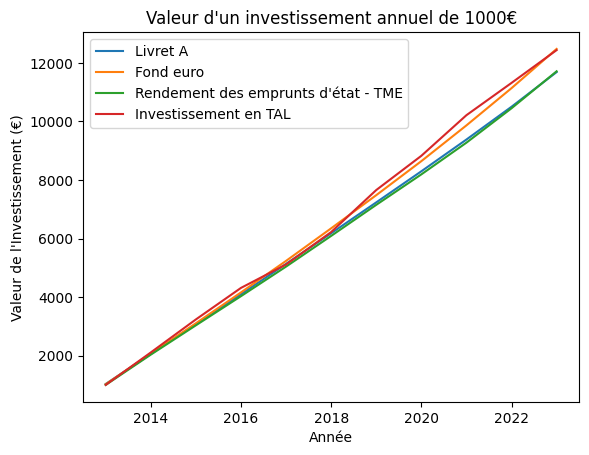

In [14]:
investment_df["Investissement en TAL"] = investment_value['investment']
print(investment_df)
# Tracer le graphique
investment_df.plot(kind='line')
plt.title("Valeur d'un investissement annuel de 1000€")
plt.ylabel('Valeur de l\'Investissement (€)')
plt.xlabel('Année')
plt.show()

<Figure size 1200x800 with 0 Axes>

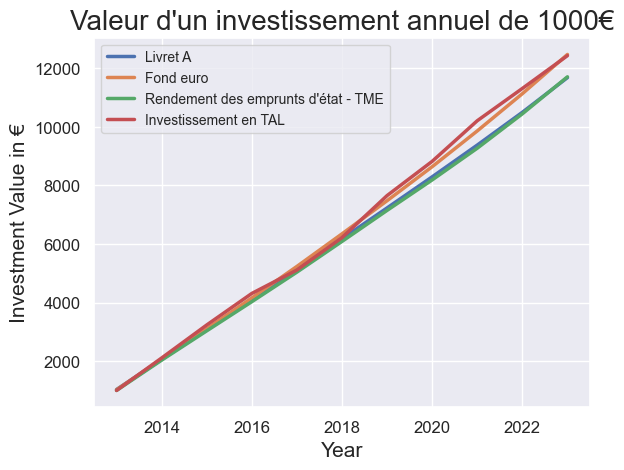

In [16]:
import seaborn as sns

# Setting a theme for the plot
sns.set_theme()

# Creating a line plot
plt.figure(figsize=(12,8))  # Set the figure size
investment_df.plot(kind='line', linewidth=2.5)

# Customizing the plot
plt.title("Valeur d'un investissement annuel de 1000€", fontsize=20)  # Set the title and font size
plt.ylabel('Investment Value in €', fontsize=15)  # Set y-axis label and font size
plt.xlabel('Year', fontsize=15)  # Set x-axis label and font size
plt.xticks(fontsize=12)  # Set x-axis tick font size
plt.yticks(fontsize=12)  # Set y-axis tick font size
plt.legend(fontsize=10)  # Set legend font size
plt.grid(True)  # Add a grid

# Displaying the plot
plt.show()

In [31]:
final_values = investment_df.iloc[-1]

percentage_difference = ((final_values - final_values.iloc[-1]) / final_values.iloc[-1]) * 100

print(final_values)
print(percentage_difference)


Livret A                               11683.601851
Fond euro                              12474.884921
Rendement des emprunts d'état - TME    11710.915314
Investissement en TAL                  12434.371540
Name: 2023, dtype: float64
Livret A                              -6.037858
Fond euro                              0.325818
Rendement des emprunts d'état - TME   -5.818197
Investissement en TAL                  0.000000
Name: 2023, dtype: float64
